In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import joblib  # To load the saved SVM model
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:

# Load the pre-trained feature extractor model
feature_extractor_model = load_model('mymodel/feature_extractor_model.keras')  # Use the path to your saved model

# Load the trained SVM classifier
svm_classifier = joblib.load('mymodel/svm_classifier.joblib')  # Assuming you saved the SVM model with joblib

# Load the LabelEncoder classes
le = LabelEncoder()
le.classes_ = np.load('label_classes.npy', allow_pickle=True)

# Define test path
test_path = 'C:/Skin disease with SVM/main dataset/test'

In [3]:

# Initialize lists to store real and predicted labels
real_label = []
predicted_class = []

# Iterate through the test dataset, extract features, and use SVM for prediction
for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        img = preprocess_input(np.array([img]))  # Preprocess the image

        # Extract features using the pre-trained feature extractor model
        features = feature_extractor_model.predict(img)
        features_flattened = features.reshape(1, -1)  # Flatten the extracted features

        # Predict the class using the SVM classifier
        predicted_class_index = svm_classifier.predict(features_flattened)[0]  # Get the predicted class index
        real_label.append(folder)
        predicted_class.append(le.classes_[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

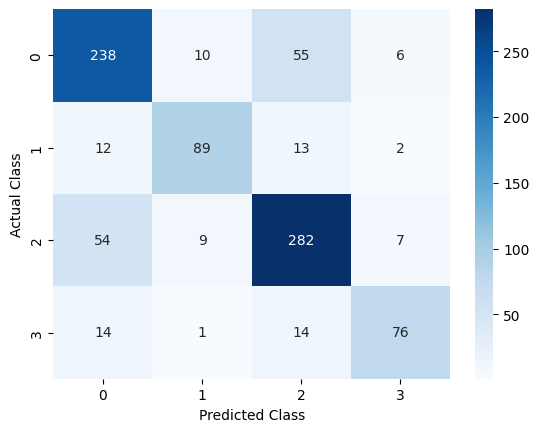

In [4]:
# Confusion matrix and heatmap
conf_matrix = confusion_matrix(real_label, predicted_class, labels=le.classes_)
num_classes = len(le.classes_)  # Get the total number of classes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [5]:

# Test a single image for prediction
image = 'C:/Skin disease with SVM\main dataset/test/Psoriasis pictures Lichen Planus and related diseases/08sebdermFace1222069.jpg'
print(f"Testing image: {image}")

img = cv2.imread(image)  # Read the image
img = cv2.resize(img, (224, 224))  # Resize to match the input size
img = preprocess_input(np.array([img]))  # Preprocess the image

# Extract features using the feature extractor
features = feature_extractor_model.predict(img)
features_flattened = features.reshape(1, -1)  # Flatten the features

# Predict the class using SVM
predicted_class_index = svm_classifier.predict(features_flattened)[0]
predicted_class = le.classes_[predicted_class_index]

print(f'The predicted class for the given image is: {predicted_class}')


Testing image: C:/Skin disease with SVM\main dataset/test/Psoriasis pictures Lichen Planus and related diseases/08sebdermFace1222069.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
The predicted class for the given image is: Psoriasis pictures Lichen Planus and related diseases
